In [4]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import joblib


# Documentation of whole project

In [2]:
from IPython.display import IFrame

IFrame("ATM Fraud Detection System.docx.pdf", width=800, height=600)


In [5]:
# loading datasets
final_train=pd.read_csv('train (1).csv')
final_test=pd.read_csv('test_share.csv')
geo=pd.read_csv('Geo_scores.csv')
instance=pd.read_csv('instance_scores.csv')
lamda=pd.read_csv('Lambda_wts.csv')
qset=pd.read_csv('Qset_tats.csv')

In [6]:
final_train.isna().sum()

id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0
Per9              0
Dem1              0
Dem2              0
Dem3              0
Dem4              0
Dem5              0
Dem6              0
Dem7              0
Dem8              0
Dem9              0
Cred1             0
Cred2             0
Cred3             0
Cred4             0
Cred5             0
Cred6             0
Normalised_FNT    0
Target            0
dtype: int64

In [7]:
final_test.isna().sum()

id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0
Per9              0
Dem1              0
Dem2              0
Dem3              0
Dem4              0
Dem5              0
Dem6              0
Dem7              0
Dem8              0
Dem9              0
Cred1             0
Cred2             0
Cred3             0
Cred4             0
Cred5             0
Cred6             0
Normalised_FNT    0
dtype: int64

In [8]:
final_train.duplicated().sum()

np.int64(0)

In [9]:
final_test.duplicated().sum()

np.int64(0)

Exploring the extra features dataset


In [10]:
geo.head()

,id,geo_score
0,26674,4.48
1,204314,4.48
2,176521,5.17
3,48812,-2.41
4,126870,6.55


In [11]:
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   id         1424035 non-null  int64  
 1   geo_score  1352492 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB


In [12]:
geo.shape

(1424035, 2)

In [13]:
geo.isna().sum()

id               0
geo_score    71543
dtype: int64

In [14]:
geo.nunique()

id           284807
geo_score     25523
dtype: int64

In [15]:
instance.head()

,id,instance_scores
0,173444,-0.88
1,259378,1.50
2,161170,0.44
3,191161,0.76
4,34521,-0.84


In [16]:
instance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1424035 non-null  int64  
 1   instance_scores  1424035 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB


In [17]:
instance.nunique()

id                 284807
instance_scores     11158
dtype: int64

In [18]:
instance.isna().sum()

id                 0
instance_scores    0
dtype: int64

In [19]:
instance.shape

(1424035, 2)

In [20]:
lamda.head()

,Group,lambda_wt
0,Grp936,3.41
1,Grp347,-2.88
2,Grp188,0.39
3,Grp1053,-2.75
4,Grp56,-0.83


In [21]:
lamda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Group      1400 non-null   object 
 1   lambda_wt  1400 non-null   float64
dtypes: float64(1), object(1)
memory usage: 22.0+ KB


In [22]:
lamda.isna().sum()

Group        0
lambda_wt    0
dtype: int64

In [23]:
lamda.shape

(1400, 2)

In [24]:
lamda.nunique()

Group        1400
lambda_wt    1400
dtype: int64

In [25]:
qset.head()

,id,qsets_normalized_tat
0,9983,2.41
1,266000,3.10
2,77525,1.03
3,160765,-11.63
4,138220,-4.48


In [26]:
qset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1424035 non-null  int64  
 1   qsets_normalized_tat  1320834 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB


In [27]:
qset.nunique()

id                      284807
qsets_normalized_tat     24832
dtype: int64

In [28]:
qset.isna().sum()

id                           0
qsets_normalized_tat    103201
dtype: int64

In [29]:
geo.head()

,id,geo_score
0,26674,4.48
1,204314,4.48
2,176521,5.17
3,48812,-2.41
4,126870,6.55


In [30]:
qset.shape

(1424035, 2)

In [31]:
geo[geo['id']==101]

,id,geo_score
98639,101,1.72
117372,101,-3.79
304562,101,-5.86
998224,101,3.10
1422095,101,7.33


In [32]:
# here there are multiple different records for same id so if we blindly merge we will lose aur strong signals this will effect the model
# thats why first we aggregate the columns then we merge it.we took mean and max cuz the fraud signals are very less that too its highly imbalanced data.
# so our model needs strong signals to identify the fraud thats why we took mean max if we go on without aggregation 
# the model wont able to perform well the result will be unstable..  

In [33]:
geo_agg = geo.groupby('id',as_index=False).agg(
    geo_score_mean=('geo_score', 'mean'),
    geo_score_max=('geo_score', 'max')

)
instance_agg = instance.groupby('id',as_index=False).agg(
    instance_score_mean=('instance_scores', 'mean'),
    instance_score_max=('instance_scores', 'max')
)
qset_agg = qset.groupby('id',as_index=False).agg(
    qsets_normalized_tat_mean=('qsets_normalized_tat', 'mean'),
    qsets_normalized_tat_max=('qsets_normalized_tat', 'max')
)

In [34]:
qset_agg.head()

,id,qsets_normalized_tat_mean,qsets_normalized_tat_max
0,0,0.2625,14.49
1,1,-0.1100,10.00
2,2,1.1100,17.95
3,3,-0.8500,7.93
4,4,-0.2400,10.52


Merging the extra feature columns in main dataset

In [35]:
final_train=final_train.merge(geo_agg,on='id',how='left')
final_train=final_train.merge(instance_agg,on='id',how='left')
final_train=final_train.merge(lamda,on='Group',how='left')
final_train=final_train.merge(qset_agg,on='id',how='left')

In [36]:
# injecting in test dataset

In [37]:
final_test=final_test.merge(geo_agg,on='id',how='left')
final_test=final_test.merge(instance_agg,on='id',how='left')
final_test=final_test.merge(lamda,on='Group',how='left')
final_test=final_test.merge(qset_agg,on='id',how='left')

In [38]:
final_train.shape

(227845, 35)

In [39]:
final_test.shape

(56962, 34)

In [40]:
final_test.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred5,Cred6,Normalised_FNT,geo_score_mean,geo_score_max,instance_score_mean,instance_score_max,lambda_wt,qsets_normalized_tat_mean,qsets_normalized_tat_max
0,146574,Grp229,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,...,0.823333,0.783333,-249.7500,0.25,8.62,-0.04,0.64,0.76,-0.5375,9.23
1,268759,Grp141,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,...,0.673333,0.673333,-249.8125,0.43,10.00,-0.77,0.96,0.18,-0.6200,6.55
2,59727,Grp188,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,...,0.680000,0.670000,-248.1200,1.32,14.88,0.11,0.52,0.39,-0.5125,8.64
3,151544,Grp426,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,...,0.676667,0.660000,-222.9875,-2.11,6.00,0.33,1.41,1.80,0.4625,11.84
4,155008,Grp443,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,...,0.650000,0.663333,-196.2200,-2.11,6.55,-0.37,0.80,1.89,-0.1300,7.93


In [41]:
final_test.drop(columns=['id','Group'],axis=1,inplace=True)

In [42]:
final_test.head()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred5,Cred6,Normalised_FNT,geo_score_mean,geo_score_max,instance_score_mean,instance_score_max,lambda_wt,qsets_normalized_tat_mean,qsets_normalized_tat_max
0,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,0.930000,0.156667,...,0.823333,0.783333,-249.7500,0.25,8.62,-0.04,0.64,0.76,-0.5375,9.23
1,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,0.543333,0.433333,...,0.673333,0.673333,-249.8125,0.43,10.00,-0.77,0.96,0.18,-0.6200,6.55
2,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,0.593333,1.250000,...,0.680000,0.670000,-248.1200,1.32,14.88,0.11,0.52,0.39,-0.5125,8.64
3,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,1.156667,1.186667,...,0.676667,0.660000,-222.9875,-2.11,6.00,0.33,1.41,1.80,0.4625,11.84
4,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,1.476667,1.213333,...,0.650000,0.663333,-196.2200,-2.11,6.55,-0.37,0.80,1.89,-0.1300,7.93


In [43]:
final_test.to_csv(
    "final_test_cleaned.csv",
    index=False
)


In [44]:
final_test.shape

(56962, 32)

In [45]:
final_train.isna().sum()

id                           0
Group                        0
Per1                         0
Per2                         0
Per3                         0
Per4                         0
Per5                         0
Per6                         0
Per7                         0
Per8                         0
Per9                         0
Dem1                         0
Dem2                         0
Dem3                         0
Dem4                         0
Dem5                         0
Dem6                         0
Dem7                         0
Dem8                         0
Dem9                         0
Cred1                        0
Cred2                        0
Cred3                        0
Cred4                        0
Cred5                        0
Cred6                        0
Normalised_FNT               0
Target                       0
geo_score_mean               0
geo_score_max                0
instance_score_mean          0
instance_score_max           0
lambda_w

In [46]:
final_test.isna().sum()

Per1                         0
Per2                         0
Per3                         0
Per4                         0
Per5                         0
Per6                         0
Per7                         0
Per8                         0
Per9                         0
Dem1                         0
Dem2                         0
Dem3                         0
Dem4                         0
Dem5                         0
Dem6                         0
Dem7                         0
Dem8                         0
Dem9                         0
Cred1                        0
Cred2                        0
Cred3                        0
Cred4                        0
Cred5                        0
Cred6                        0
Normalised_FNT               0
geo_score_mean               0
geo_score_max                0
instance_score_mean          0
instance_score_max           0
lambda_wt                    0
qsets_normalized_tat_mean    0
qsets_normalized_tat_max     0
dtype: i

In [47]:
final_train.duplicated().sum()

np.int64(0)

In [48]:
final_test.duplicated().sum()

np.int64(0)

In [49]:
final_test.columns

Index(['Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7', 'Per8', 'Per9',
       'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7', 'Dem8', 'Dem9',
       'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6', 'Normalised_FNT',
       'geo_score_mean', 'geo_score_max', 'instance_score_mean',
       'instance_score_max', 'lambda_wt', 'qsets_normalized_tat_mean',
       'qsets_normalized_tat_max'],
      dtype='object')

In [50]:
final_train.shape

(227845, 35)

In [51]:
final_test.shape

(56962, 32)

In [52]:
final_train.duplicated().sum()

np.int64(0)

EDA

In [53]:
final_train.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred6,Normalised_FNT,Target,geo_score_mean,geo_score_max,instance_score_mean,instance_score_max,lambda_wt,qsets_normalized_tat_mean,qsets_normalized_tat_max
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.673333,-245.7500,0,0.275,18.68,-0.06,0.68,-0.13,-0.700000,4.48
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.653333,-248.0000,0,-0.250,7.24,0.52,4.44,0.66,0.140000,7.59
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.673333,-233.1250,0,-0.950,5.17,1.56,5.24,-0.51,-0.430000,7.51
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.760000,-249.7775,0,0.490,9.35,0.70,2.18,0.72,-0.516667,7.93
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.673333,-247.5775,0,0.850,8.62,-0.47,0.40,0.60,-0.630000,7.88


In [54]:
final_train.Target.value_counts()

Target
0    227451
1       394
Name: count, dtype: int64

In [55]:
# Target is in float format thats why changed to int
final_train['Target']=final_train['Target'].astype(int)

In [56]:
final_train.Target.value_counts()

Target
0    227451
1       394
Name: count, dtype: int64

In [57]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227845 entries, 0 to 227844
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         227845 non-null  int64  
 1   Group                      227845 non-null  object 
 2   Per1                       227845 non-null  float64
 3   Per2                       227845 non-null  float64
 4   Per3                       227845 non-null  float64
 5   Per4                       227845 non-null  float64
 6   Per5                       227845 non-null  float64
 7   Per6                       227845 non-null  float64
 8   Per7                       227845 non-null  float64
 9   Per8                       227845 non-null  float64
 10  Per9                       227845 non-null  float64
 11  Dem1                       227845 non-null  float64
 12  Dem2                       227845 non-null  float64
 13  Dem3                       22

In [58]:
print("Train missing value percentage:",final_train.isna().sum()/len(final_train)*100)
print("Test missing value percentage:",final_test.isna().sum()/len(final_test)*100)
final_train.isna().sum()

Train missing value percentage: id                           0.0
Group                        0.0
Per1                         0.0
Per2                         0.0
Per3                         0.0
Per4                         0.0
Per5                         0.0
Per6                         0.0
Per7                         0.0
Per8                         0.0
Per9                         0.0
Dem1                         0.0
Dem2                         0.0
Dem3                         0.0
Dem4                         0.0
Dem5                         0.0
Dem6                         0.0
Dem7                         0.0
Dem8                         0.0
Dem9                         0.0
Cred1                        0.0
Cred2                        0.0
Cred3                        0.0
Cred4                        0.0
Cred5                        0.0
Cred6                        0.0
Normalised_FNT               0.0
Target                       0.0
geo_score_mean               0.0
geo_score_m

id                           0
Group                        0
Per1                         0
Per2                         0
Per3                         0
Per4                         0
Per5                         0
Per6                         0
Per7                         0
Per8                         0
Per9                         0
Dem1                         0
Dem2                         0
Dem3                         0
Dem4                         0
Dem5                         0
Dem6                         0
Dem7                         0
Dem8                         0
Dem9                         0
Cred1                        0
Cred2                        0
Cred3                        0
Cred4                        0
Cred5                        0
Cred6                        0
Normalised_FNT               0
Target                       0
geo_score_mean               0
geo_score_max                0
instance_score_mean          0
instance_score_max           0
lambda_w

In [59]:
final_train.duplicated().sum()

np.int64(0)

In [60]:
final_test.duplicated().sum()

np.int64(0)

In [61]:
final_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,227845.0,142404.076201,82170.248170,0.000000,71325.000000,142374.000000,213492.000000,284805.000000
Per1,227845.0,0.666006,0.654133,-18.136667,0.360000,0.670000,1.103333,1.483333
Per2,227845.0,0.667701,0.548305,-23.573333,0.470000,0.690000,0.933333,8.020000
Per3,227845.0,0.666315,0.506357,-15.443333,0.370000,0.726667,1.010000,3.793333
Per4,227845.0,0.666687,0.471956,-1.226667,0.383333,0.660000,0.913333,6.163333
Per5,227845.0,0.666723,0.461393,-37.246667,0.436667,0.650000,0.870000,12.266667
Per6,227845.0,0.667378,0.444573,-8.053333,0.410000,0.576667,0.800000,25.100000
Per7,227845.0,0.666934,0.415657,-13.853333,0.483333,0.680000,0.856667,40.863333
Per8,227845.0,0.666279,0.401546,-23.740000,0.596667,0.673333,0.776667,7.336667
Per9,227845.0,0.666688,0.366537,-3.810000,0.453333,0.650000,0.866667,5.863333


In [62]:
# def boxplot(col):
#   sns.boxplot(final_train[col])
#   plt.show()

# for col in final_train.select_dtypes(include=['int64','float64']).columns:
#   boxplot(col)
  # just to analyze

In [63]:
# plt.figure(figsize=(30,10))
# sns.heatmap(final_train.corr(),annot=True)
# plt.show()

In [64]:
# Top corelated columns
# top_corr=final_train.corr()['Target'].sort_values(ascending=False)
# top_corr

Data Preprocessing

In [65]:
final_train['Target'].isna().sum()

np.int64(0)

In [66]:
final_train['Group'].unique()

array(['Grp169', 'Grp161', 'Grp261', ..., 'Grp1210', 'Grp1370', 'Grp712'],
      shape=(1301,), dtype=object)

In [67]:
final_train.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred6,Normalised_FNT,Target,geo_score_mean,geo_score_max,instance_score_mean,instance_score_max,lambda_wt,qsets_normalized_tat_mean,qsets_normalized_tat_max
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.673333,-245.7500,0,0.275,18.68,-0.06,0.68,-0.13,-0.700000,4.48
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.653333,-248.0000,0,-0.250,7.24,0.52,4.44,0.66,0.140000,7.59
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.673333,-233.1250,0,-0.950,5.17,1.56,5.24,-0.51,-0.430000,7.51
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.760000,-249.7775,0,0.490,9.35,0.70,2.18,0.72,-0.516667,7.93
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.673333,-247.5775,0,0.850,8.62,-0.47,0.40,0.60,-0.630000,7.88


In [68]:
## Here i am splitting the data without using train_test_split() i m doing in manual method to avoid data leakage
np.random.seed(42)
split_size=0.20
# 1. unique groups
unique_groups=final_train['Group'].unique()
# 2. how many groups needed for test
n_test=int(split_size*len(unique_groups))

# 3. Randomly 20% groups select karo
test_groups=np.random.choice(
    unique_groups,
    size=n_test,
    replace=False
)

In [69]:
# 4. spliting the data frames
df_test  = final_train[final_train['Group'].isin(test_groups)].reset_index(drop=True)
df_train = final_train[~final_train['Group'].isin(test_groups)].reset_index(drop=True)

In [70]:
print("Train Shape:",df_train.shape)
print("Test Shape:",df_test.shape)

Train Shape: (184136, 35)
Test Shape: (43709, 35)


In [71]:
print("df_test duplicates:",df_test.duplicated().sum(),
      "\ndf_train_duplicates:",df_train.duplicated().sum(),
      "\n***********"
      "\ndf_test missing values:",df_test.isna().sum(),
      "\n**********************"
      "\ndf_train missing values:",df_train.isna().sum())

df_test duplicates: 0 
df_train_duplicates: 0 
***********
df_test missing values: id                           0
Group                        0
Per1                         0
Per2                         0
Per3                         0
Per4                         0
Per5                         0
Per6                         0
Per7                         0
Per8                         0
Per9                         0
Dem1                         0
Dem2                         0
Dem3                         0
Dem4                         0
Dem5                         0
Dem6                         0
Dem7                         0
Dem8                         0
Dem9                         0
Cred1                        0
Cred2                        0
Cred3                        0
Cred4                        0
Cred5                        0
Cred6                        0
Normalised_FNT               0
Target                       0
geo_score_mean               0
geo_score_max     

In [72]:
# here we splited manually instead using train_test_split to avoid data leakage.. there maybe chances that same values will go in test also 
# while we are using this  train_test_split so we  avoided it. we did it manually we splitted based on group to ensure that every data should be not repeated..

In [73]:
target_col = 'Target'
drop_cols = ['Target', 'id', 'Group']

x_train = df_train.drop(columns=drop_cols)
y_train = df_train[target_col]

x_test = df_test.drop(columns=drop_cols)
y_test = df_test[target_col]


In [74]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(184136, 32) (43709, 32) (184136,) (43709,)


In [75]:
# threshold optimization func
import time
from sklearn.metrics import precision_score, recall_score, f1_score, fbeta_score
def threshold_optimization(y_test, y_prob,
                           thresholds=np.arange(0.30, 0.80, 0.02),
                           Average_responce_time=None,
                           beta=2): # f2 score here we are giving more imp to recall

    records = []

    for t in thresholds:
        y_pred = (y_prob >= t).astype(int)

        records.append({
            "threshold": t,
            "precision": precision_score(y_test, y_pred, zero_division=0),
            "recall": recall_score(y_test, y_pred, zero_division=0),
            "f2": fbeta_score(y_test, y_pred, beta=beta, zero_division=0),
            "Average_responce_time": Average_responce_time,

        })
    return pd.DataFrame(records)

In [76]:
# cost_weighted_accuracy func
from sklearn.metrics import confusion_matrix

def cost_weighted_accuracy(y_true, y_pred, cost_fp=1, cost_fn=5):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    total_cost = (fp * cost_fp) + (fn * cost_fn)
    max_cost = len(y_true) * cost_fn
    return round(1 - (total_cost / max_cost), 4)


In [77]:
# calculation of scale_pos_weight

neg = (y_train == 0).sum()
pos = (y_train == 1).sum()

scale_pos_weight = neg / pos # formula
print("scale_pos_weight:", scale_pos_weight)


scale_pos_weight: 587.2939297124601


In [78]:
from sklearn.metrics import accuracy_score,confusion_matrix, roc_auc_score,classification_report,fbeta_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import average_precision_score
from sklearn.metrics import average_precision_score


In [79]:
!pip install lightgbm


**Baseline** **Model**

In [80]:
preprocess = Pipeline(
    steps=[
        ("scaler", StandardScaler())
    ]
)

In [81]:
results=[]

In [82]:
log_reg_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("model", LogisticRegression(
            class_weight="balanced",
            max_iter=1000,
            n_jobs=-1
        ))
    ]
)
# 1. Fit pipeline
log_reg_pipeline.fit(x_train, y_train)
y_prob_train=log_reg_pipeline.predict_proba(x_train)[:,1]

# 2. Predict probabilities
start_time = time.time()
y_prob_test = log_reg_pipeline.predict_proba(x_test)[:, 1]
end_time = time.time()
avg_response_time = ((end_time - start_time) / len(x_test)) * 1000

# 3. Threshold optimization
threshold_df = threshold_optimization(
    y_test=y_test,
    y_prob=y_prob_test,
    beta=2
)

# # 4. Filter thresholds (PDF criteria)
validation_threshs = threshold_df[
    (threshold_df["precision"] >= 0.30) &
    (threshold_df["recall"] >= 0.85) &
    (threshold_df["f2"] >= 0.70)
]

# 5. Select best threshold safely
if len(validation_threshs) > 0:
    best_threshold = (
        validation_threshs
        .sort_values(by="f2", ascending=False)
        .iloc[0]["threshold"]
    )
else:
    best_threshold = (
        threshold_df
        .sort_values(by="f2", ascending=False)
        .iloc[0]["threshold"]
    )

# 6. Final predictions using tuned threshold

y_pred_test_final = (y_prob_test >= best_threshold).astype(int)

# here we didnt tuned on test we just applyed the same threshold on train also to check overfitting
y_pred_train = (y_prob_train >= best_threshold).astype(int)
print("***********Logistic Regression*************")
print("Train")
print(classification_report(y_train, y_pred_train ))
print("Test")
print(classification_report(y_test, y_pred_test_final))

# cost_weighted_accuracy
cwa = cost_weighted_accuracy(
    y_test,
    y_pred_test_final,
    cost_fp=1,
    cost_fn=5
)

auprc = average_precision_score(y_test, y_prob_test)

joblib.dump(log_reg_pipeline, "log_reg_fraud_pipeline.pkl")
joblib.dump(best_threshold, "best_log_reg_threshold.pkl")


***********Logistic Regression*************
Train
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    183823
           1       0.12      0.87      0.21       313

    accuracy                           0.99    184136
   macro avg       0.56      0.93      0.60    184136
weighted avg       1.00      0.99      0.99    184136

Test
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     43628
           1       0.14      0.94      0.25        81

    accuracy                           0.99     43709
   macro avg       0.57      0.96      0.62     43709
weighted avg       1.00      0.99      0.99     43709



['best_log_reg_threshold.pkl']

In [83]:
# these are the results of the model which stores in the list
best_row = threshold_df[threshold_df["threshold"] == best_threshold].iloc[0]
results.append({
    "Model": "Logistic Regression",
     "Default_Threshold": 0.5,
    "Tuned_Threshold":best_row["threshold"],
    "Precision": best_row["precision"],
    "Recall": best_row["recall"],
    "F2_Score": best_row["f2"],
    "Cost_Weighted_Accuracy": cwa,
    "Avg_Response_Time": avg_response_time,
    "AUPRC": auprc,

})



In [84]:
results

[{'Model': 'Logistic Regression',
  'Default_Threshold': 0.5,
  'Tuned_Threshold': np.float64(0.7800000000000005),
  'Precision': np.float64(0.1444866920152091),
  'Recall': np.float64(0.9382716049382716),
  'F2_Score': np.float64(0.4470588235294118),
  'Cost_Weighted_Accuracy': np.float64(0.9978),
  'Avg_Response_Time': 0.0007211031535529859,
  'AUPRC': 0.7489350285487847}]

# RandomForest Model

In [85]:
rf_model_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("model",RandomForestClassifier(
          n_estimators=300,
          max_depth=6,
          min_samples_split=10,
          min_samples_leaf=4,
          class_weight='balanced',
          max_samples=0.7,
          random_state=42,
          n_jobs=-1

        ))
    ]
)
# 1. Fit pipeline
rf_model_pipeline.fit(x_train, y_train)

y_prob_train=rf_model_pipeline.predict_proba(x_train)[:,1]

# 2. Predict probabilities
start_time = time.time()
y_prob_test = rf_model_pipeline.predict_proba(x_test)[:, 1]
end_time = time.time()
avg_response_time = ((end_time - start_time) / len(x_test)) * 1000

# 3. Threshold optimization
threshold_df = threshold_optimization(
    y_test=y_test,
    y_prob=y_prob_test,
    beta=2
)

# # 4. Filter thresholds (PDF criteria)
validation_threshs = threshold_df[
    (threshold_df["precision"] >= 0.30) &
    (threshold_df["recall"] >= 0.85) &
    (threshold_df["f2"] >= 0.70)
]

# 5. Select best threshold safely
if len(validation_threshs) > 0:
    best_threshold = (
        validation_threshs
        .sort_values(by="f2", ascending=False)
        .iloc[0]["threshold"]
    )
else:
    best_threshold = (
        threshold_df
        .sort_values(by="f2", ascending=False)
        .iloc[0]["threshold"]
    )

# 6. Final predictions using tuned threshold

y_pred_test_final = (y_prob_test >= best_threshold).astype(int)

# here we didnt tuned on train we just applyed the same threshold on train also to check overfitting
y_pred_train = (y_prob_train >= best_threshold).astype(int)
print("************** RandomForest Model ***************")
print("Train")
print(classification_report(y_train, y_pred_train ))
print("Test")
print(classification_report(y_test, y_pred_test_final))
# cost_weighted_accuracy
cwa = cost_weighted_accuracy(
    y_test,
    y_pred_test_final,
    cost_fp=1,
    cost_fn=5
)

auprc = average_precision_score(y_test, y_prob_test)

joblib.dump(rf_model_pipeline, "rforest_fraud_pipeline.pkl")
joblib.dump(best_threshold, "best_rf_threshold.pkl")


************** RandomForest Model ***************
Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    183823
           1       0.74      0.87      0.80       313

    accuracy                           1.00    184136
   macro avg       0.87      0.93      0.90    184136
weighted avg       1.00      1.00      1.00    184136

Test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43628
           1       0.66      0.88      0.76        81

    accuracy                           1.00     43709
   macro avg       0.83      0.94      0.88     43709
weighted avg       1.00      1.00      1.00     43709



['best_rf_threshold.pkl']

In [86]:
best_row = threshold_df[threshold_df["threshold"] == best_threshold].iloc[0]
results.append({
    "Model": "RandomForest Model",
    "Default_Threshold": 0.5,
    "Tuned_Threshold":best_row["threshold"],
    "Precision": best_row["precision"],
    "Recall": best_row["recall"],
    "F2_Score": best_row["f2"],
    "Cost_Weighted_Accuracy": cwa,
    "Avg_Response_Time": avg_response_time,
    "AUPRC": auprc,

})

In [87]:
results

[{'Model': 'Logistic Regression',
  'Default_Threshold': 0.5,
  'Tuned_Threshold': np.float64(0.7800000000000005),
  'Precision': np.float64(0.1444866920152091),
  'Recall': np.float64(0.9382716049382716),
  'F2_Score': np.float64(0.4470588235294118),
  'Cost_Weighted_Accuracy': np.float64(0.9978),
  'Avg_Response_Time': 0.0007211031535529859,
  'AUPRC': 0.7489350285487847},
 {'Model': 'RandomForest Model',
  'Default_Threshold': 0.5,
  'Tuned_Threshold': np.float64(0.5200000000000002),
  'Precision': np.float64(0.6635514018691588),
  'Recall': np.float64(0.8765432098765432),
  'F2_Score': np.float64(0.8236658932714617),
  'Cost_Weighted_Accuracy': np.float64(0.9996),
  'Avg_Response_Time': 0.00613119594075897,
  'AUPRC': 0.830413889065643}]

## XG-Boost Model

In [88]:
preprocess = Pipeline(
    steps=[
        ("scaler", StandardScaler())
    ]
)

xgb_model_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("model",XGBClassifier(
            n_estimators=200,          # enough trees, not too many
            max_depth=3,               # shallow trees = less overfitting
            learning_rate=0.05,        # slow learning
            subsample=0.7,             # row sampling (anti overfit)
            colsample_bytree=0.7,      # feature sampling
            min_child_weight=15,       # prevents learning noise
            gamma=2,                   # split only if useful
            reg_alpha=1.0,             # L1 regularization
            reg_lambda=5.0,            # L2 regularization
            scale_pos_weight=scale_pos_weight,
            objective='binary:logistic',
            eval_metric='aucpr',
            random_state=42,
            n_jobs=-1

        ))
    ]
)
# 1. Fit pipeline
xgb_model_pipeline.fit(x_train, y_train)
y_prob_train=xgb_model_pipeline.predict_proba(x_train)[:,1]


# 2. Predict probabilities
start_time = time.time()
y_prob_test = xgb_model_pipeline.predict_proba(x_test)[:, 1]
end_time = time.time()
avg_response_time = ((end_time - start_time) / len(x_test)) * 1000


# 3. Threshold optimization
threshold_df = threshold_optimization(
    y_test=y_test,
    y_prob=y_prob_test,
    beta=2
)

# # 4. Filter thresholds (PDF criteria)
validation_threshs = threshold_df[
    (threshold_df["precision"] >= 0.85) &
    (threshold_df["recall"] >= 0.85) &
    (threshold_df["f2"] >= 0.60)
]

# 5. Select best threshold safely
if len(validation_threshs) > 0:
    best_threshold = (
        validation_threshs
        .sort_values(by="f2", ascending=False)
        .iloc[0]["threshold"]
    )
else:
    best_threshold = (
        threshold_df
        .sort_values(by="f2", ascending=False)
        .iloc[0]["threshold"]
    )
# 6. Final predictions using tuned threshold

y_pred_test_final = (y_prob_test >= best_threshold).astype(int)

# here we didnt tuned on train we just applyed the same threshold on train also to check overfitting
y_pred_train = (y_prob_train >= best_threshold).astype(int)

print("********** XGBoost Model **********")

print("Train")
print(classification_report(y_train, y_pred_train ))
print("Test")
print(classification_report(y_test, y_pred_test_final))
# cost_weighted_accuracy
cwa = cost_weighted_accuracy(
    y_test,
    y_pred_test_final,
    cost_fp=1,
    cost_fn=5
)

auprc = average_precision_score(y_test, y_prob_test)



joblib.dump(xgb_model_pipeline, "xgb_fraud_pipeline.pkl")
joblib.dump(best_threshold, "fraud_threshold.pkl")

********** XGBoost Model **********
Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    183823
           1       0.54      0.94      0.68       313

    accuracy                           1.00    184136
   macro avg       0.77      0.97      0.84    184136
weighted avg       1.00      1.00      1.00    184136

Test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43628
           1       0.45      0.93      0.60        81

    accuracy                           1.00     43709
   macro avg       0.72      0.96      0.80     43709
weighted avg       1.00      1.00      1.00     43709



['fraud_threshold.pkl']

## Feature imporatnce

In [89]:

feature_names = (xgb_model_pipeline.named_steps["preprocess"].get_feature_names_out())

In [90]:
xgb_model = xgb_model_pipeline.named_steps["model"]

xgb_importance = pd.DataFrame({
    "feature":feature_names ,
    "importance": xgb_model.feature_importances_
}).sort_values(by="importance", ascending=False)

xgb_importance.reset_index(drop=True)


,feature,importance
0,lambda_wt,0.226460
1,instance_score_mean,0.114228
2,geo_score_mean,0.074156
3,Per4,0.061810
4,Cred1,0.034819
5,qsets_normalized_tat_max,0.032385
6,Dem7,0.030241
7,Normalised_FNT,0.027366
8,Dem6,0.026534
9,Per8,0.025804


### Cross Validation on xgboost

In [91]:
# it will breakdown the training data into multiple foldes then it will train and validate it
# we can apply cross-validation on a specific metric also
# Cross-validation recall of 0.82 was obtained using a fixed threshold of 0.5 to assess raw generalization. 
# # After threshold optimization, the final model achieved 0.90 recall on the test set.

# from sklearn.metrics import recall_score, fbeta_score
# from sklearn.model_selection import StratifiedKFold, cross_val_predict
# from sklearn.metrics import recall_score, fbeta_score

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# probs = cross_val_predict(
#     xgb_model_pipeline,
#     x_train,
#     y_train,
#     cv=cv,
#     method="predict_proba"
# )[:, 1]

# optimal_threshold = best_threshold  # already computed earlier

# preds = (probs >= optimal_threshold).astype(int)

# print("CV Recall (optimized threshold):",
#       recall_score(y_train, preds))

# print("CV F2 (optimized threshold):",
#       fbeta_score(y_train, preds, beta=2))


In [92]:
# these are the results of the model which stores in the list
best_row = threshold_df[threshold_df["threshold"] == best_threshold].iloc[0]
results.append({
    "Model": "XGBoost Model",
    "Default_Threshold": 0.5,
    "Tuned_Threshold":best_row["threshold"],
    "Precision": best_row["precision"],
    "Recall": best_row["recall"],
    "F2_Score": best_row["f2"],
    "Cost_Weighted_Accuracy": cwa,
    "Avg_Response_Time": avg_response_time,
    "AUPRC": auprc,
})

In [93]:
results

[{'Model': 'Logistic Regression',
  'Default_Threshold': 0.5,
  'Tuned_Threshold': np.float64(0.7800000000000005),
  'Precision': np.float64(0.1444866920152091),
  'Recall': np.float64(0.9382716049382716),
  'F2_Score': np.float64(0.4470588235294118),
  'Cost_Weighted_Accuracy': np.float64(0.9978),
  'Avg_Response_Time': 0.0007211031535529859,
  'AUPRC': 0.7489350285487847},
 {'Model': 'RandomForest Model',
  'Default_Threshold': 0.5,
  'Tuned_Threshold': np.float64(0.5200000000000002),
  'Precision': np.float64(0.6635514018691588),
  'Recall': np.float64(0.8765432098765432),
  'F2_Score': np.float64(0.8236658932714617),
  'Cost_Weighted_Accuracy': np.float64(0.9996),
  'Avg_Response_Time': 0.00613119594075897,
  'AUPRC': 0.830413889065643},
 {'Model': 'XGBoost Model',
  'Default_Threshold': 0.5,
  'Tuned_Threshold': np.float64(0.7800000000000005),
  'Precision': np.float64(0.4491017964071856),
  'Recall': np.float64(0.9259259259259259),
  'F2_Score': np.float64(0.7637474541751528),
  

## LightGBM Model

In [94]:
lgb_model_pipeline = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("model",LGBMClassifier(

                n_estimators=260,
                learning_rate=0.05,
                max_depth=3,              # shallow trees
                num_leaves=8,            # control complexity
                min_child_samples=400,    # prevents noise learning
                subsample=0.7,
                colsample_bytree=0.7,
                reg_alpha=2.0,            # L1 regularization
                reg_lambda=6.0,           # L2 regularization
                scale_pos_weight=scale_pos_weight,
                objective="binary",
                random_state=42,
                n_jobs=-1

        ))
    ]
)
# 1. Fit pipeline
lgb_model_pipeline.fit(x_train, y_train)
y_prob_train=lgb_model_pipeline.predict_proba(x_train)[:,1]

# 2. Predict probabilities
start_time = time.time()
y_prob_test = lgb_model_pipeline.predict_proba(x_test)[:, 1]
end_time = time.time()
avg_response_time = ((end_time - start_time) / len(x_test)) * 1000

# 3. Threshold optimization
threshold_df = threshold_optimization(
    y_test=y_test,
    y_prob=y_prob_test,
    beta=2
)

# # 4. Filter thresholds (PDF criteria)
validation_threshs = threshold_df[
    (threshold_df["precision"] >= 0.30) &
    (threshold_df["recall"] >= 0.85) &
    (threshold_df["f2"] >= 0.70)
]

# 5. Select best threshold safely
if len(validation_threshs) > 0:
    best_threshold = (validation_threshs.sort_values(by="f2", ascending=False).iloc[0]["threshold"]
    )
else:
    best_threshold = (threshold_df.sort_values(by="f2", ascending=False).iloc[0]["threshold"])

# 6. Final predictions using tuned threshold

y_pred_test_final = (y_prob_test >= best_threshold).astype(int)

y_pred_train = (y_prob_train >= best_threshold).astype(int)
print("************* LightGBM Model *************")
print("Train")
print(classification_report(y_train, y_pred_train ))
print("Test")
print(classification_report(y_test, y_pred_test_final))

# cost_weighted_accuracy
cwa = cost_weighted_accuracy(
    y_test,
    y_pred_test_final,
    cost_fp=1,
    cost_fn=5
)

auprc = average_precision_score(y_test, y_prob_test)


joblib.dump(lgb_model_pipeline, "lgb_fraud_pipeline.pkl")
joblib.dump(best_threshold, "best_lgb_threshold.pkl")

[LightGBM] [Info] Number of positive: 313, number of negative: 183823
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030026 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8160
[LightGBM] [Info] Number of data points in the train set: 184136, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001700 -> initscore=-6.375525
[LightGBM] [Info] Start training from score -6.375525
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

['best_lgb_threshold.pkl']

## Cross validation on lightgbm

In [95]:
# from sklearn.metrics import recall_score, fbeta_score
# from sklearn.model_selection import StratifiedKFold, cross_val_score
# from sklearn.metrics import make_scorer, recall_score

# recall_scorer = make_scorer(recall_score)

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# scores = cross_val_score(
#    lgb_model_pipeline,
#     x_train,
#     y_train,
#     scoring=recall_scorer,
#     cv=cv
# )

# print("CV Recall scores:", scores)
# print("Mean CV Recall:", scores.mean())


In [96]:
# after crossvalidation recall result:

# ==== CV SUMMARY ====
# Mean Recall: 0.7984126984126984
# Std Recall : 0.04718920233044276
# Mean F2    : 0.6147088084158866

In [97]:
# these are the results of the model which stores in the list
best_row = threshold_df[threshold_df["threshold"] == best_threshold].iloc[0]
results.append({
    "Model": "LightGBM Model",
    "Default_Threshold": 0.5,
    "Tuned_Threshold":best_row["threshold"],
    "Precision": best_row["precision"],
    "Recall": best_row["recall"],
    "F2_Score": best_row["f2"],
    "Cost_Weighted_Accuracy": cwa,
    "Avg_Response_Time": avg_response_time,
    "AUPRC": auprc,
})

In [98]:
results

[{'Model': 'Logistic Regression',
  'Default_Threshold': 0.5,
  'Tuned_Threshold': np.float64(0.7800000000000005),
  'Precision': np.float64(0.1444866920152091),
  'Recall': np.float64(0.9382716049382716),
  'F2_Score': np.float64(0.4470588235294118),
  'Cost_Weighted_Accuracy': np.float64(0.9978),
  'Avg_Response_Time': 0.0007211031535529859,
  'AUPRC': 0.7489350285487847},
 {'Model': 'RandomForest Model',
  'Default_Threshold': 0.5,
  'Tuned_Threshold': np.float64(0.5200000000000002),
  'Precision': np.float64(0.6635514018691588),
  'Recall': np.float64(0.8765432098765432),
  'F2_Score': np.float64(0.8236658932714617),
  'Cost_Weighted_Accuracy': np.float64(0.9996),
  'Avg_Response_Time': 0.00613119594075897,
  'AUPRC': 0.830413889065643},
 {'Model': 'XGBoost Model',
  'Default_Threshold': 0.5,
  'Tuned_Threshold': np.float64(0.7800000000000005),
  'Precision': np.float64(0.4491017964071856),
  'Recall': np.float64(0.9259259259259259),
  'F2_Score': np.float64(0.7637474541751528),
  

In [99]:
x_train.columns.tolist()

['Per1',
 'Per2',
 'Per3',
 'Per4',
 'Per5',
 'Per6',
 'Per7',
 'Per8',
 'Per9',
 'Dem1',
 'Dem2',
 'Dem3',
 'Dem4',
 'Dem5',
 'Dem6',
 'Dem7',
 'Dem8',
 'Dem9',
 'Cred1',
 'Cred2',
 'Cred3',
 'Cred4',
 'Cred5',
 'Cred6',
 'Normalised_FNT',
 'geo_score_mean',
 'geo_score_max',
 'instance_score_mean',
 'instance_score_max',
 'lambda_wt',
 'qsets_normalized_tat_mean',
 'qsets_normalized_tat_max']

## StackingClassifier Model

In [100]:
rf_pipeline = Pipeline([
    ("preprocess", preprocess),
    ("model", RandomForestClassifier(
          n_estimators=300,
          max_depth=6,
          min_samples_split=10,
          min_samples_leaf=4,
          class_weight='balanced',
          max_samples=0.7,
          random_state=42,
          n_jobs=-1
    ))
])

xgb_pipeline = Pipeline([
    ("preprocess", preprocess),
    ("model", XGBClassifier(
     n_estimators=200,          # enough trees, not too many
            max_depth=3,               # shallow trees = less overfitting
            learning_rate=0.05,        # slow learning
            subsample=0.7,             # row sampling (anti overfit)
            colsample_bytree=0.7,      # feature sampling
            min_child_weight=15,       # prevents learning noise
            gamma=2,                   # split only if useful
            reg_alpha=1.0,             # L1 regularization
            reg_lambda=5.0,            # L2 regularization
            scale_pos_weight=scale_pos_weight,
            objective='binary:logistic',
            eval_metric='aucpr',
            random_state=42,
            n_jobs=-1
    ))
])
lgb_pipeline = Pipeline([
    ("preprocess", preprocess),
    ("model", LGBMClassifier(
                n_estimators=260,
                learning_rate=0.05,
                max_depth=3,              # shallow trees
                num_leaves=8,            # control complexity
                min_child_samples=400,    # prevents noise learning
                subsample=0.7,
                colsample_bytree=0.7,
                reg_alpha=2.0,            # L1 regularization
                reg_lambda=6.0,           # L2 regularization
                scale_pos_weight=scale_pos_weight,
                objective="binary",
                random_state=42,
                n_jobs=-1
    ))
])



In [101]:
lr_meta = LogisticRegression(
    max_iter=1000,
    n_jobs=-1
)
stratified_cv = StratifiedKFold(
    n_splits=10,
    shuffle=True,
    random_state=42
)


In [102]:
stacking_model = StackingClassifier(
    estimators=[
        ("rf", rf_pipeline),
        ("xgb", xgb_pipeline),
        ("lgb", lgb_pipeline)
    ],
    final_estimator=lr_meta,
    stack_method="predict_proba",
    cv=stratified_cv,
    passthrough=False,
    n_jobs=-1
)

# 1. Fit pipeline
stacking_model.fit(x_train, y_train)

# 2. Predict probabilities
# done this just to compare
y_prob_train=stacking_model.predict_proba(x_train)[:,1]

start_time = time.time()
y_prob_test = stacking_model.predict_proba(x_test)[:, 1]
end_time = time.time()
avg_response_time = ((end_time - start_time) / len(x_test)) * 1000

# 3. Threshold optimization
threshold_df = threshold_optimization(
    y_test=y_test,
    y_prob=y_prob_test,
    beta=2
)

# # 4. Filter thresholds (PDF criteria)
validation_threshs = threshold_df[
    (threshold_df["precision"] >= 0.40) &
    (threshold_df["recall"] >= 0.85) &
    (threshold_df["f2"] >= 0.70)
]

# 5. Select best threshold safely
if len(validation_threshs) > 0:
    best_threshold = (validation_threshs.sort_values(by="f2", ascending=False).iloc[0]["threshold"]
    )
else:
    best_threshold = (threshold_df.sort_values(by="f2", ascending=False).iloc[0]["threshold"]
    )

# 6. Final predictions using tuned threshold

y_pred_test_final = (y_prob_test >= best_threshold).astype(int)

#this is done for comparing train and test
y_pred_train = (y_prob_train >= best_threshold).astype(int)

print("************* Stacking Model ************")
print("Train")
print(classification_report(y_train, y_pred_train))
print("Test")
print(classification_report(y_test, y_pred_test_final))

# cost_weighted_accuracy
cwa = cost_weighted_accuracy(
    y_test,
    y_pred_test_final,
    cost_fp=1,
    cost_fn=5
)

auprc = average_precision_score(y_test, y_prob_test)

joblib.dump(stacking_model, "stacking_fraud_pipeline.pkl")
joblib.dump(best_threshold, "best_stack_threshold.pkl")

************* Stacking Model ************
Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    183823
           1       0.85      0.84      0.85       313

    accuracy                           1.00    184136
   macro avg       0.92      0.92      0.92    184136
weighted avg       1.00      1.00      1.00    184136

Test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43628
           1       0.77      0.88      0.82        81

    accuracy                           1.00     43709
   macro avg       0.89      0.94      0.91     43709
weighted avg       1.00      1.00      1.00     43709



['best_stack_threshold.pkl']

In [103]:
# these are the results of the model which stores in the list
best_row = threshold_df[threshold_df["threshold"] == best_threshold].iloc[0]
results.append({
    "Model": "Stacking Model",
    "Default_Threshold": 0.5,
    "Tuned_Threshold":best_row["threshold"],
    "Precision": best_row["precision"],
    "Recall": best_row["recall"],
    "F2_Score": best_row["f2"],
    "Cost_Weighted_Accuracy": cwa,
    "Avg_Response_Time": avg_response_time,
    "AUPRC": auprc,
})

In [104]:
results

[{'Model': 'Logistic Regression',
  'Default_Threshold': 0.5,
  'Tuned_Threshold': np.float64(0.7800000000000005),
  'Precision': np.float64(0.1444866920152091),
  'Recall': np.float64(0.9382716049382716),
  'F2_Score': np.float64(0.4470588235294118),
  'Cost_Weighted_Accuracy': np.float64(0.9978),
  'Avg_Response_Time': 0.0007211031535529859,
  'AUPRC': 0.7489350285487847},
 {'Model': 'RandomForest Model',
  'Default_Threshold': 0.5,
  'Tuned_Threshold': np.float64(0.5200000000000002),
  'Precision': np.float64(0.6635514018691588),
  'Recall': np.float64(0.8765432098765432),
  'F2_Score': np.float64(0.8236658932714617),
  'Cost_Weighted_Accuracy': np.float64(0.9996),
  'Avg_Response_Time': 0.00613119594075897,
  'AUPRC': 0.830413889065643},
 {'Model': 'XGBoost Model',
  'Default_Threshold': 0.5,
  'Tuned_Threshold': np.float64(0.7800000000000005),
  'Precision': np.float64(0.4491017964071856),
  'Recall': np.float64(0.9259259259259259),
  'F2_Score': np.float64(0.7637474541751528),
  

In [105]:
final_result_df=pd.DataFrame(results).sort_values(by='F2_Score',ascending=False).reset_index(drop=True)
final_result_df

,Model,Default_Threshold,Tuned_Threshold,Precision,Recall,F2_Score,Cost_Weighted_Accuracy,Avg_Response_Time,AUPRC
0,Stacking Model,0.5,0.42,0.771739,0.876543,0.853365,0.9997,0.014288,0.847393
1,RandomForest Model,0.5,0.52,0.663551,0.876543,0.823666,0.9996,0.006131,0.830414
2,XGBoost Model,0.5,0.78,0.449102,0.925926,0.763747,0.9994,0.001246,0.833740
3,LightGBM Model,0.5,0.78,0.350467,0.925926,0.697026,0.9992,0.004732,0.814137
4,Logistic Regression,0.5,0.78,0.144487,0.938272,0.447059,0.9978,0.000721,0.748935


### Model comparision

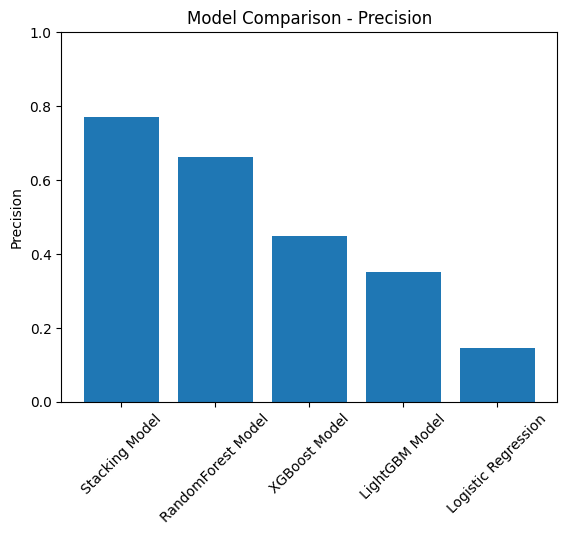

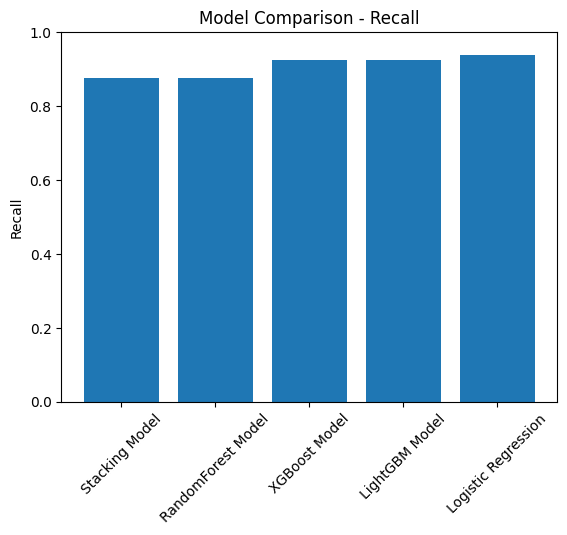

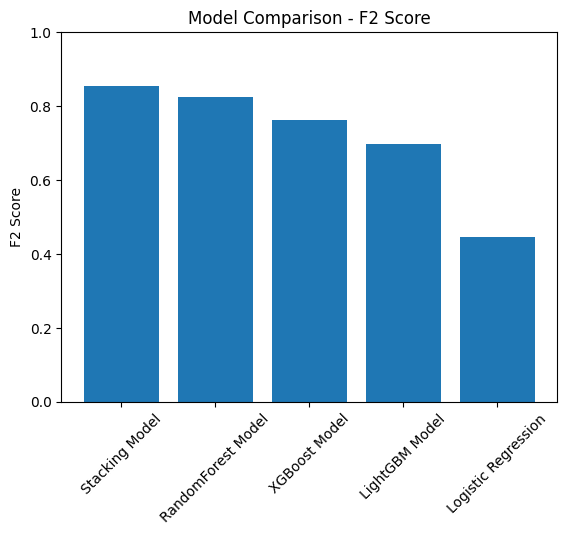

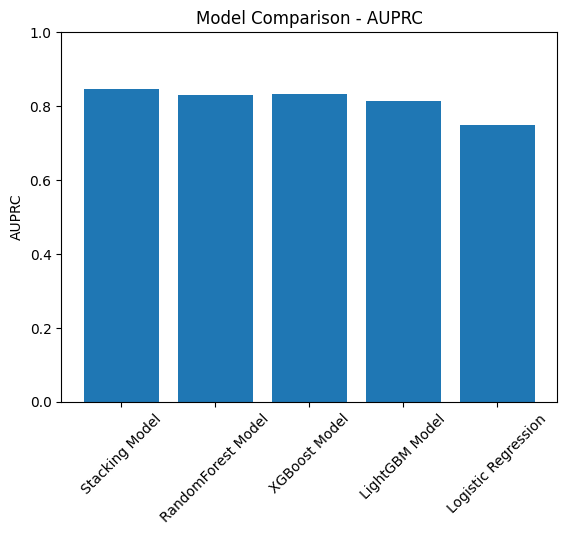

In [108]:
import matplotlib.pyplot as plt

df = final_result_df

# Precision
plt.figure()
plt.bar(df["Model"], df["Precision"])
plt.title("Model Comparison - Precision")
plt.ylabel("Precision")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

# Recall
plt.figure()
plt.bar(df["Model"], df["Recall"])
plt.title("Model Comparison - Recall")
plt.ylabel("Recall")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

# F2 Score
plt.figure()
plt.bar(df["Model"], df["F2_Score"])
plt.title("Model Comparison - F2 Score")
plt.ylabel("F2 Score")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

# AUPRC
plt.figure()
plt.bar(df["Model"], df["AUPRC"])
plt.title("Model Comparison - AUPRC")
plt.ylabel("AUPRC")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()
